In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

train = pd.read_csv(r"./Data/Result.csv")

In [2]:
train = train.astype({
    "Month":'category',
    "OperatingSystems":'category',
    "Browser":'category',
    "Region":'category',
    "TrafficType":'category',
    "VisitorType":'category',
    "Weekend":'bool',
    "Revenue":'bool'
})

In [3]:
train = train.set_index('ID')
Data = train.drop(["Revenue"], axis=1)
Target = train['Revenue']
X_train, X_test, y_train, y_test = train_test_split(Data, Target,test_size=0.2,random_state=0)

In [4]:
clf=svm.SVC(kernel='rbf',C=1,gamma='auto')
clf.fit(X_train,y_train)
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)

In [5]:
print("Train Accuracy",clf.score(X_train,y_train))
print("Test Accuracy", clf.score(X_test, y_test))
print("Recall:", metrics.recall_score(y_test, pred_test))

Train Accuracy 0.9987642879209144
Test Accuracy 0.8332303891290921
Recall: 0.0


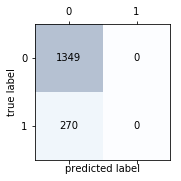

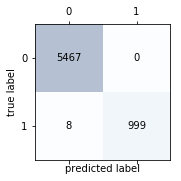

In [6]:
def Plot_confusion(y_true, y_pred):
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.show()
#Test data
Plot_confusion(y_test, pred_test)

#train data
Plot_confusion(y_train,pred_train)

>可以發現如果不做Normalization，盡管在Train Data效果很好，訓練出來的模型把Test Data都預測0(Recall = 0)，這樣的模型是沒有意義的。
